# Task 6: Ящик с усами#
Помните, как мы пытались выяснить, влияет ли посещение ленты новостей на поведение пользователей из тестовой и контрольной групп? В прошлый раз мы просто рассчитывали средние значения. Но знаем ли мы о дисперсиях? Что, если они тоже изменились? Что, если возникли аномальные значения? Чтобы ответить на эти вопросы, нужно построить "ящик с усами" или boxplot.

Выполните необходимые шаги по созданию следующего графика:


*   Используйте данные из этого файла, считайте их в датафрейм и внесите любые изменения, которые, по вашему мнению, помогут решить задачу. 

*   Размер figsize остается прежним, размер шрифта можно выбрать по своему вкусу.

*   Цветовая палитра должна быть такой же, как в примере.
*   Размер шрифта заголовка — 15.


*   Ширина линий ящиков — 3, ширина линий медианы — 2.
*   В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопрос: «Каким было значение IQR контрольной группы до посещения новостной ленты?». В своем ответе укажите приблизительное значение, которое можно получить, просто посмотрев на график, и округлите его до ближайшего целого, кратного 10.



In [1]:
import pandas as pd
import sqlite3 as sq
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/School21/day12/data/ab-test.csv')


In [4]:
after = data[data.time == 'after']
after = after.rename(columns = {'diff':'after'})
after = after.drop(columns = {'time', 'uid'})
after

,after,group
0,-103.333333,test
2,-10.000000,test
4,-82.333333,test
6,-78.500000,test
8,-127.500000,test
10,-136.500000,test
12,-158.500000,test
14,-75.000000,control
16,-81.500000,control
18,-32.000000,control


In [5]:
before = data[data.time == 'before']
before = before.rename(columns = {'diff':'before'})
before = before.drop(columns = {'time', 'uid'})
before

,before,group
1,-6.000000,test
3,-3.500000,test
5,-148.000000,test
7,-112.500000,test
9,-69.333333,test
11,-53.000000,test
13,-70.000000,test
15,-103.000000,control
17,-15.500000,control
19,-3.000000,control


In [6]:
after['before'] = list(before['before'])
after

,after,group,before
0,-103.333333,test,-6.000000
2,-10.000000,test,-3.500000
4,-82.333333,test,-148.000000
6,-78.500000,test,-112.500000
8,-127.500000,test,-69.333333
10,-136.500000,test,-53.000000
12,-158.500000,test,-70.000000
14,-75.000000,control,-103.000000
16,-81.500000,control,-15.500000
18,-32.000000,control,-3.000000


In [7]:
after.shape

(22, 3)

In [8]:
after.to_csv()

',after,group,before\n0,-103.33333333333331,test,-6.0\n2,-10.0,test,-3.5\n4,-82.33333333333333,test,-148.0\n6,-78.5,test,-112.5\n8,-127.5,test,-69.33333333333333\n10,-136.5,test,-53.0\n12,-158.5,test,-70.0\n14,-75.0,control,-103.0\n16,-81.5,control,-15.5\n18,-32.0,control,-3.0\n20,17.5,control,-153.0\n22,-94.0,control,-202.0\n24,-49.0,control,-16.0\n26,-131.66666666666666,control,-156.0\n28,-322.6666666666667,control,-75.0\n30,-77.0,control,-40.0\n32,-9.0,control,-3.5\n34,-144.66666666666666,control,-176.5\n36,-114.5,control,-95.0\n38,-140.66666666666666,control,-228.0\n40,-93.33333333333331,control,-16.5\n42,-142.33333333333334,control,-187.5\n'

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, 'Lag before labs deadlines. After and before the Newsfeed')

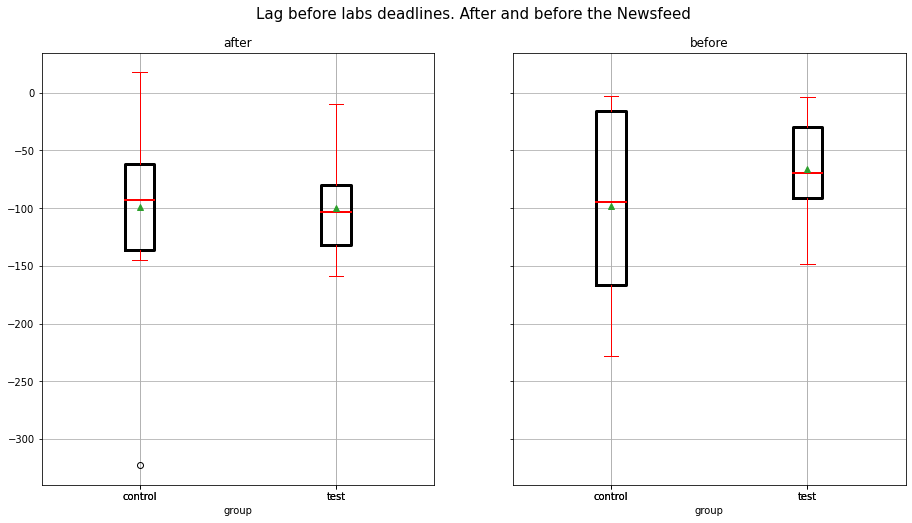

In [12]:
after.boxplot(column=['after', 'before'],
        by='group', 
        fontsize=10, 
        figsize=(15, 8),
        grid=True,
        showmeans=True,
        boxprops = dict(linestyle='-', linewidth=3, color='black'),
        medianprops = dict(linestyle='-', linewidth=2, color='red'),
        whiskerprops = dict(linestyle='-', linewidth=1, color='red'),
        capprops = dict(linestyle='-', linewidth=1, color='red'),
          )
plt.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)

«Каким было значение IQR контрольной группы до посещения новостной ленты?». В своем ответе укажите приблизительное значение, которое можно получить, просто посмотрев на график, и округлите его до ближайшего целого, кратного 10.

Ответ: 150